# Imported required libraries

In [1]:
import tweepy 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Twitter API credentials
consumer_key = "1E8eY4bIE5VgTo3DWUgBQLoXf"
consumer_secret = "0Io9rJNDk6OuIdbuX5BTB4fiDgRCWkJH3YP15iQivvBuJUco4N"
access_key = "1301090680152883200-Cvzk4sBprcEkEnh0NuRX5DIHKoxf2f"
access_secret = "W0IYFVa6JlRix9ZAESEZUD2MNrJCcKfLHCchACgFPAoZF"
alltweets = []

### Loading the user's twwet bsed on above credentials

In [3]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name, count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name, count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))     
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    

    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

# Loading the file

In [4]:
tweet = get_all_tweets("imVkohli")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2305 tweets downloaded so far
...2305 tweets downloaded so far


In [5]:
tweet.head()

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2020-12-08 12:47:11,[],[],148840,None,1336291233837137921,en,None,6701,False,Twitter for Android,Tough outing but remarkable fighting spirit sh...,,Virat Kohli,None,None
1,2020-12-07 05:10:01,"[{'text': 'one8', 'indices': [103, 108]}]",[],79592,None,1335813794031783937,en,None,2768,False,Twitter for Android,It’s all about the process. Intensify your tra...,,Virat Kohli,None,None
2,2020-12-06 12:25:12,[],[],214344,None,1335560925655363584,en,None,10042,False,Twitter for Android,Amazing game of cricket. Well done boys 🙌 http...,,Virat Kohli,None,None
3,2020-12-04 12:55:08,[],[],201039,None,1334843679555522565,en,None,7494,False,Twitter for Android,On to Sydney 👍🏻. https://t.co/jRkH6SM4LY,,Virat Kohli,None,None
4,2020-12-03 05:10:03,"[{'text': 'one8', 'indices': [31, 36]}]",[],63497,None,1334364250853150721,en,None,2311,False,Twitter for Android,Kick things 🆙 a notch with the #one8 Smash. \n...,,Virat Kohli,None,None


In [6]:
tweet1=tweet.text
tweet_string = " ".join(tweet1)

In [7]:
# Removing unwanted symbols incase if exists
import re
tweet_string = re.sub("[^A-Za-z" "]+"," ",tweet_string).lower()
tweet_string = re.sub("[0-9" "]+"," ",tweet_string)

In [8]:
tweet_words = tweet_string.split(" ")
print(tweet_words)

['tough', 'outing', 'but', 'remarkable', 'fighting', 'spirit', 'shown', 'by', 'the', 'boys', 'on', 'to', 'the', 'tests', 'now', 'https', 't', 'co', 'd', 'v', 'eacpc', 'it', 's', 'all', 'about', 'the', 'process', 'intensify', 'your', 'training', 'with', 'those', 'quick', 'and', 'explosive', 'movements', 'cop', 'the', 'one', 'lqdcel', 'https', 't', 'co', 'fn', 'e', 'gjof', 'amazing', 'game', 'of', 'cricket', 'well', 'done', 'boys', 'https', 't', 'co', 'iuqiixntkj', 'on', 'to', 'sydney', 'https', 't', 'co', 'jrkh', 'sm', 'ly', 'kick', 'things', 'a', 'notch', 'with', 'the', 'one', 'smash', 'cop', 'the', 'timeless', 'trainer', 'on', 'https', 't', 'co', 'aty', 'deeccs', 'collection', 'link', 'h', 'https', 't', 'co', 'xncnf', 'vtcd', 'proud', 'of', 'this', 'team', 'we', 'march', 'forward', 'on', 'to', 'the', 't', 's', 'https', 't', 'co', 'kdfutw', 'b', 'r', 'haha', 'good', 'skills', 'mate', 'maybe', 'we', 'can', 'get', 'you', 'in', 'as', 'a', 'counter', 'attacking', 'batsman', 'hkane', 'https

In [9]:
with open(r"C:\Users\Binita Mandal\Desktop\finity\Text mining\stop.txt") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

tweet_words = [w for w in tweet_words if not w in stopwords]

In [10]:
# Joinining all the reviews into single paragraph 
tweet_para = " ".join(tweet_words)

# Tokenization

In [11]:
#Punctuation
no_punc_text = tweet_para.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'tough outing remarkable fighting spirit shown boys tests https eacpc process intensify training quick explosive movements cop lqdcel https fn gjof amazing game cricket boys https iuqiixntkj sydney https jrkh sm ly kick things notch smash cop timeless trainer https aty deeccs collection link https xncnf vtcd proud team march forward https kdfutw haha good skills mate counter attacking batsman hkane https ryjmvukdwo https kcqkvr eu remembering innocent lives lost bravehearts saved attacks https tnssjypy rip diego maradona changed beautiful game football played true genius guys finally visit instagram profile scroll filters tab ar filte https gfa gawj winter comfy winter wear styles wrogn snag winter wear staywrogn https qnup npz happy returns day navdeepsaini wishing success wonderful year ahead back field rebounding millions indians story https unbfgiqc wishing fcgoaofficial today match season ahead forcagoa riseagain fuel https cnb gd designed men business gas range fragrances https h

In [12]:
#Tokenization
from nltk.tokenize import word_tokenize
token =word_tokenize(no_punc_text) # sent_tokenize(twt_join)
print(token[0:50])

['tough', 'outing', 'remarkable', 'fighting', 'spirit', 'shown', 'boys', 'tests', 'https', 'eacpc', 'process', 'intensify', 'training', 'quick', 'explosive', 'movements', 'cop', 'lqdcel', 'https', 'fn', 'gjof', 'amazing', 'game', 'cricket', 'boys', 'https', 'iuqiixntkj', 'sydney', 'https', 'jrkh', 'sm', 'ly', 'kick', 'things', 'notch', 'smash', 'cop', 'timeless', 'trainer', 'https', 'aty', 'deeccs', 'collection', 'link', 'https', 'xncnf', 'vtcd', 'proud', 'team', 'march']


In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
wordnet

<WordNetLemmatizer>

In [14]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in token if not word in my_stop_words]
print(no_stop_tokens[0:50])

['tough', 'outing', 'remarkable', 'fighting', 'spirit', 'shown', 'boys', 'tests', 'https', 'eacpc', 'process', 'intensify', 'training', 'quick', 'explosive', 'movements', 'cop', 'lqdcel', 'https', 'fn', 'gjof', 'amazing', 'game', 'cricket', 'boys', 'https', 'iuqiixntkj', 'sydney', 'https', 'jrkh', 'sm', 'ly', 'kick', 'things', 'notch', 'smash', 'cop', 'timeless', 'trainer', 'https', 'aty', 'deeccs', 'collection', 'link', 'https', 'xncnf', 'vtcd', 'proud', 'team', 'march']


[nltk_data] Downloading package punkt to C:\Users\Binita
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Binita
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:40])

['tough', 'outing', 'remarkable', 'fighting', 'spirit', 'shown', 'boys', 'tests', 'https', 'eacpc', 'process', 'intensify', 'training', 'quick', 'explosive', 'movements', 'cop', 'lqdcel', 'https', 'fn', 'gjof', 'amazing', 'game', 'cricket', 'boys', 'https', 'iuqiixntkj', 'sydney', 'https', 'jrkh', 'sm', 'ly', 'kick', 'things', 'notch', 'smash', 'cop', 'timeless', 'trainer', 'https']


# Feature Extraction

In [16]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['tough', 'outing', 'remark', 'fight', 'spirit', 'shown', 'boy', 'test', 'http', 'eacpc', 'process', 'intensifi', 'train', 'quick', 'explos', 'movement', 'cop', 'lqdcel', 'http', 'fn', 'gjof', 'amaz', 'game', 'cricket', 'boy', 'http', 'iuqiixntkj', 'sydney', 'http', 'jrkh', 'sm', 'ly', 'kick', 'thing', 'notch', 'smash', 'cop', 'timeless', 'trainer', 'http']


In [17]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [18]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

tough outing remarkable fighting spirit shown boys tests https eacpc process intensify training quick explosive movements cop lqdcel https fn gjof amazing game cricket boys https iuqiixntkj sydney https jrkh sm ly kick things notch smash cop timeless trainer https


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['tough', 'out', 'remarkable', 'fight', 'spirit', 'show', 'boy', 'test', 'https', 'eacpc', 'process', 'intensify', 'train', 'quick', 'explosive', 'movement', 'cop', 'lqdcel', 'https', 'fn', 'gjof', 'amazing', 'game', 'cricket', 'boys']


# TFidf vectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(lemmas)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
df =pd.DataFrame(dense, columns=feature_names)

In [21]:
df

,aa,aac,aad,aage,aalim,aalimhakim,aamir,aamit,aati,aaxpb,...,zxdmgf,zxxr,zy,zyggewb,zykwlxz,zz,zzdnhbwm,zzqnth,zzsxsrzaiw,zzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Creating wordCloud from above dataset

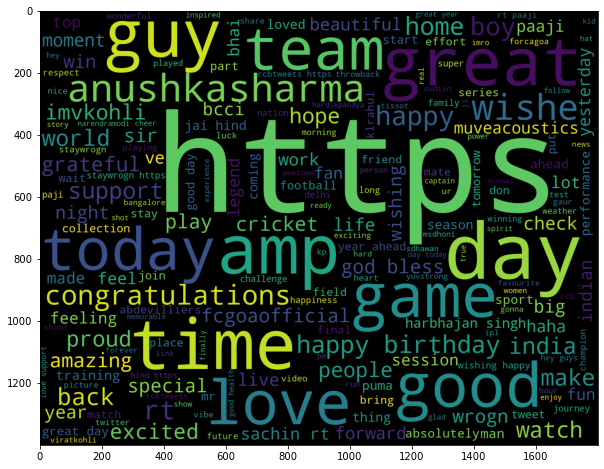

In [22]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(tweet_para)

plt.figure(figsize=(10,20))
plt.imshow(wordcloud_ip)

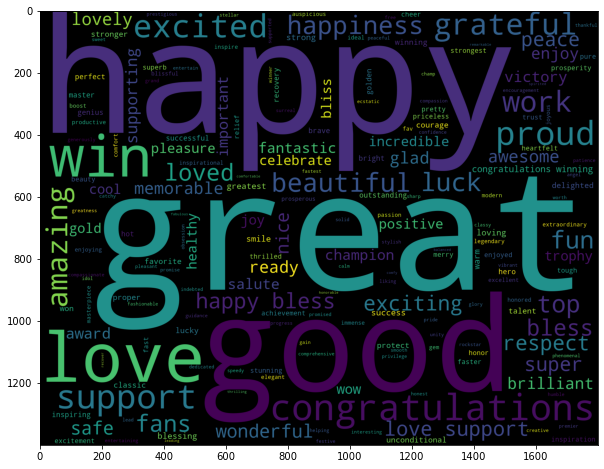

In [23]:
# positive words # Choose the path for +ve words stored in system
with open(r"C:\Users\Binita Mandal\Desktop\finity\Text mining\positive-words.txt") as pos:
  poswords = pos.read().split("\n")
  
# Choosing the only words which are present in positive words
tweet_pos = " ".join ([w for w in tweet_words if w in poswords])

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(tweet_pos)
plt.figure(figsize=(10, 20))

plt.imshow(wordcloud_pos)

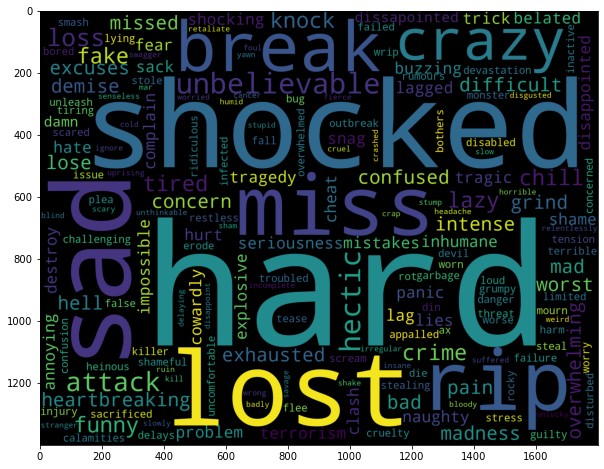

In [24]:
# negative words  Choose path for -ve words stored in system
with open(r"C:\Users\Binita Mandal\Desktop\finity\Text mining\negative-words.txt") as neg:
  negwords = neg.read().split("\n")

# Choosing the only words which are present in negwords
movie_neg = " ".join ([w for w in tweet_words if w in negwords])

# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(movie_neg)
plt.figure(figsize=(10, 20))

plt.imshow(wordcloud_neg)